In [1]:
import tensorflow as tf
import keras
from keras import layers
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.models import Model

In [2]:
while os.getcwd() != "C:\\My Projects\\Opdracht-schilders":
    os.chdir('..')


os.getcwd()

'C:\\My Projects\\Opdracht-schilders'

# Interpretatie gekozen model

In deze notebook zal ik enkele **technieken van hoofdstuk 9** in het boek gebruiken om inzicht te verkrijgen naar de werking van mijn gekozen model.

## Visualiseren van tussentijdse activeringen

### Preprocessing 1 enkele image

In [3]:
def get_img_array(img_path, target_size):
    img = keras.utils.load_img(
        img_path, target_size=target_size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

img_tensor = get_img_array("datasets/paintings/Rembrandt/28.jpg", target_size=(180, 180))


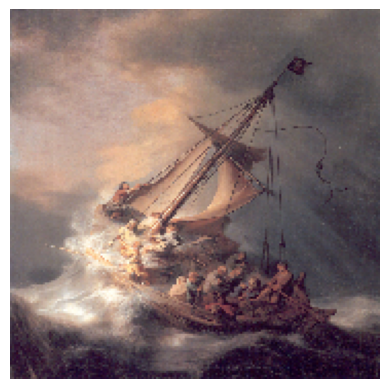

In [4]:
plt.axis("off")
plt.imshow(img_tensor[0].astype("uint8"))
plt.show()

In [14]:
layer_outputs = []
layer_names = []

model = keras.models.load_model("4. Eigen Modellen/4.2 CNN met transfer learning/ResNet_data_augmentation_retrainable_convbase.keras")

for layer in model.layers:
    if isinstance(layer, keras.layers.):
        print(layer.name)
#         layer_outputs.append(layer.output)
#         layer_names.append(layer.name)
# activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)
# activations = activation_model.predict(img_tensor)
    print(layer)

# first_layer_activation = activations[0]
# print(first_layer_activation.ndim)
# plt.matshow(first_layer_activation[:, :], cmap="viridis")

In [8]:
model = keras.models.load_model("4. Eigen Modellen/4.2 CNN met transfer learning/ResNet_data_augmentation_retrainable_convbase.keras")

def plot_activations(layer_idx, activations):
    layer_activation = activations[layer_idx][0]
    n_row = 8
    n_column = layer_activation.shape[-1]//n_row

    f, ax = plt.subplots(n_row, n_column)
    for i in range(n_row):
        for j in range(n_column):
            channel_image = layer_activation[:, :, i*n_column+j]
            # image post-processing for better visualization
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')

            ax[i, j].imshow(channel_image, cmap='viridis')
            ax[i, j].axis('off')
            ax[i, j].set_xticklabels([])
            ax[i, j].set_yticklabels([])
    plt.subplots_adjust(wspace=0, hspace=0)
    f.set_size_inches(n_column, n_row)
    plt.show()



layer_outputs = [layer.output for layer in model.layers if not layer.name.startswith('input')]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)


ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, None, None, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'") at layer "conv1_pad". The following previous layers were accessed without issue: []